<a href="https://colab.research.google.com/github/aishwikr/Computer-vision/blob/master/Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

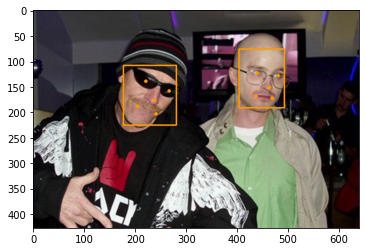

[{'box': [404, 76, 89, 115], 'confidence': 0.9961259961128235, 'keypoints': {'left_eye': (440, 123), 'right_eye': (481, 128), 'nose': (464, 151), 'mouth_left': (437, 168), 'mouth_right': (469, 172)}}, {'box': [177, 108, 104, 117], 'confidence': 0.9784203171730042, 'keypoints': {'left_eye': (221, 139), 'right_eye': (267, 158), 'nose': (238, 176), 'mouth_left': (205, 188), 'mouth_right': (241, 203)}}]


In [1]:
import cv2
!pip install mtcnn
from mtcnn.mtcnn import MTCNN
#from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


detector = MTCNN()

image = cv2.imread("pic4.jpg")
result = detector.detect_faces(image)

for i in range(0,len(result)):
    bounding_box = result[i]['box']
    keypoints = result[i]['keypoints']
    
    #print(bounding_box)
    #print(keypoints)
    
    cv2.rectangle(image,
                  (bounding_box[0], bounding_box[1]),
                  (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                  (0,155,255),
                  2)
    
    cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
    cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
    cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
    cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
    cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)
    
cv2.imwrite("img_drawn.jpg", image)
img=mpimg.imread('img_drawn.jpg')
imgplot = plt.imshow(img)
plt.show()

print(result)



In [0]:
"""Webcam Code as follows: """

cap = cv2.VideoCapture(0)
while True: 
    #Capture frame-by-frame
    __, frame = cap.read()
    
    #Use MTCNN to detect faces
    result = detector.detect_faces(frame)
    if result != []:
        for person in result:
            for i in range(0,len(result)):
                bounding_box = person[i]['box']
                keypoints = person[i]['keypoints']
        
                cv2.rectangle(frame,
                              (bounding_box[0], bounding_box[1]),
                              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                              (0,155,255),
                              2)
        
                cv2.circle(frame,(keypoints['left_eye']), 2, (0,155,255), 2)
                cv2.circle(frame,(keypoints['right_eye']), 2, (0,155,255), 2)
                cv2.circle(frame,(keypoints['nose']), 2, (0,155,255), 2)
                cv2.circle(frame,(keypoints['mouth_left']), 2, (0,155,255), 2)
                cv2.circle(frame,(keypoints['mouth_right']), 2, (0,155,255), 2)
    #display resulting frame
    cv2.imshow('image',frame)
    
    if cv2.waitKey(1) &0xFF == ord('q'):
        break

#When everything's done, release capture
cap.release()
cv2.destroyAllWindows(